# Proyecto 3

 [Presentación](https://acortar.link/Nro7os)

 Obtener un dataset con las valoraciones de Bitcoin de los últimos 365 días.

Con lo que vimos ayer en la clase de API, intenta conseguir ese dataset.  

Graficar.

1) Importación de librerías necesarias:

In [1]:

import pandas as pd
import csv
import requests
import ast
import matplotlib
import matplotlib.pyplot as plt
import datetime
import numpy as np

2) Consumir la API Binance:

In [3]:
ct = str(int(datetime.datetime.now().timestamp()))
c2 = datetime.datetime.now() - datetime.timedelta(days=365*10)
ct2 = str(int(c2.timestamp()))

APIurl = "https://api.binance.com/api/v3/klines?symbol=BTCUSDT&interval=3d&limit=1000&startTime="+ct2+"000&endTime="+ct+"000"
APIresp = requests.get(APIurl)
print(APIresp.ok)
print(APIresp.status_code)
print(APIresp.elapsed)
x = ast.literal_eval(APIresp.text)
df = pd.DataFrame(x)

True
200
0:00:00.507236


In [4]:
# Grabamos el resultado como CSV separado por comas
CSVfilename = "binance.csv"
df.to_csv(CSVfilename, index=False)

In [5]:
df = df.drop(df.columns[[0,1,2,3,5,7,8,9,10,11]], axis='columns')
df.rename( columns={4 :'Close price'}, inplace=True)
df.rename( columns={6 :'Fecha'}, inplace=True)
df['Close price'] = pd.to_numeric(df['Close price'])

3) Convetir fecha

In [6]:
from datetime import datetime
listaDate = []
for date in df['Fecha']:
    listaDate.append(datetime.fromtimestamp(date//1000))
df.index = listaDate

4) convertir antes al formato datetime para que lo reconozca como índice timestamp

<function matplotlib.pyplot.show(*args, **kw)>

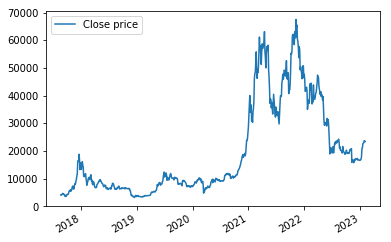

In [7]:
df.plot(kind='line', y='Close price')
plt.show

In [8]:
semestral = df.groupby(np.arange(len(df))//6).mean()

In [9]:
semestral["dif"] = semestral.cambio.diff()

AttributeError: 'DataFrame' object has no attribute 'cambio'

In [ ]:
semestral["variacion"] = semestral.dif/semestral.cambio.shift(1)*100

### Métodos para realizar predicciones en series de tiempo:

- Modelos ARIMA 
- Modelos de procesos estocásticos(Holt-Winters, para manejar la estacionalidad y la tendencia en los datos)

- Redes neuronales artificiales (RNNs), Long Short-Term Memory y Gated Recurrent Unit), se usan para manejar secuencias de datos y pueden capturar patrones complejos)
  
- Modelos basados en aprendizaje automático: XGBoost y Random Forest.

- Modelos de propagación de tendencias: Croston (predecin la frecuencia y la magnitud de los eventos con baja frecuencia)